In [1]:
# The code was removed by Watson Studio for sharing.

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-23T14:46:02.000,45459574,HEAT/HOT WATER,11208.0,54 ELDERT LANE,ELDERT LANE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.689998,-73.867822,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-23T05:05:12.000,45459581,HEAT/HOT WATER,10463.0,3805 REVIEW PLACE,REVIEW PLACE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.884961,-73.899639,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-23T15:51:43.000,45460622,HEAT/HOT WATER,10467.0,3280 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.877404,-73.880713,NaN,RESIDENTIAL BUILDING,Open
3,2020-01-23T18:28:57.000,45459699,PAINT/PLASTER,10033.0,427 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.849395,-73.938903,NaN,RESIDENTIAL BUILDING,Open
4,2020-01-23T18:42:16.000,45460666,HEAT/HOT WATER,10459.0,1304 REV JAMES POLITE AVENUE,REV JAMES POLITE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.830102,-73.895252,NaN,RESIDENTIAL BUILDING,Open


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Considering scope of the problem statement selecting only incident_zip,borough and street_name columns for analysis

In [3]:
df_data['complaint_type'] = np.where(df_data['complaint_type']=='HEATING','HEAT/HOT WATER',df_data['complaint_type'])
df_req = df_data.loc[df_data['complaint_type'] == 'HEAT/HOT WATER',['complaint_type','incident_zip','borough','street_name']]
print(df_req.dtypes)

complaint_type     object
incident_zip      float64
borough            object
street_name        object
dtype: object


In [4]:
print(df_req['borough'].value_counts().head())

BRONX          603773
BROOKLYN       573017
MANHATTAN      421865
Unspecified    282917
QUEENS         243292
Name: borough, dtype: int64


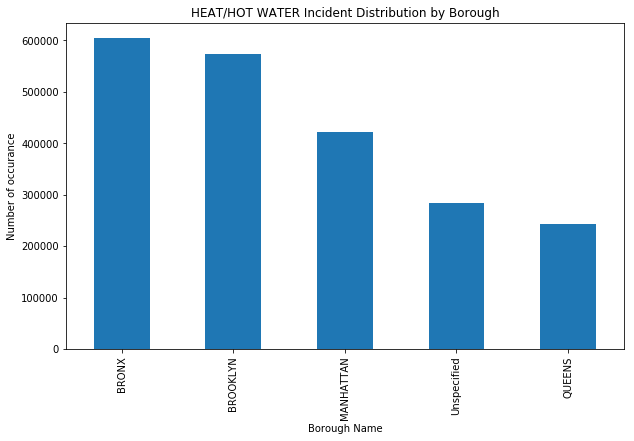

In [5]:
df_req['borough'].value_counts().head().plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Borough Name') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Distribution by Borough') # add title to the plot
#
plt.show()

As we can see here Bronx has highest number of occurences (603773) for complaint type Heat/hot water followed by Brooklyn(573017)

In [6]:
print(df_req['incident_zip'].value_counts().head())

11226.0    68839
10467.0    65892
10458.0    65178
10468.0    58018
10453.0    57672
Name: incident_zip, dtype: int64


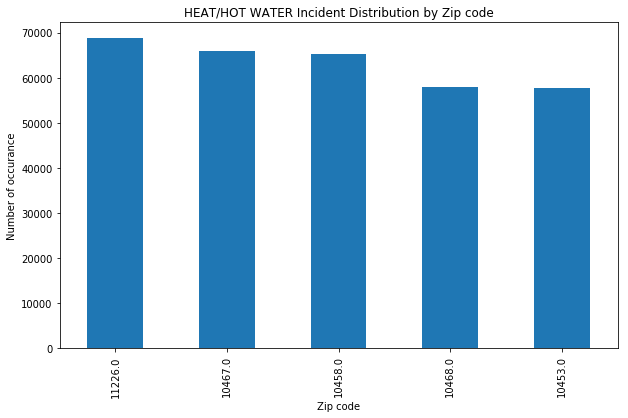

In [7]:
df_req['incident_zip'].value_counts().head().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Zip code') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Distribution by Zip code') # add title to the plot
plt.show()

As we can see here 11226 ZIP code has highest number of occurences (68839) for complaint type Heat/hot water.

In [8]:
df_req.loc[df_req['incident_zip'] == 11226.0].head()

,complaint_type,incident_zip,borough,street_name
139,HEAT/HOT WATER,11226.0,BROOKLYN,EAST 16 STREET
158,HEAT/HOT WATER,11226.0,BROOKLYN,FLATBUSH AVENUE
170,HEAT/HOT WATER,11226.0,BROOKLYN,LENOX ROAD
182,HEAT/HOT WATER,11226.0,BROOKLYN,EAST 22 STREET
197,HEAT/HOT WATER,11226.0,BROOKLYN,EAST 21 STREET


More insight<br>11226 incident zip code belongs to Brooklyn borough which has second highest number of complaints recieved for HEAT/HOT Water

GRAND CONCOURSE    37740
BROADWAY           24445
OCEAN AVENUE       18644
MORRIS AVENUE      16367
ARDEN STREET       15952
Name: street_name, dtype: int64


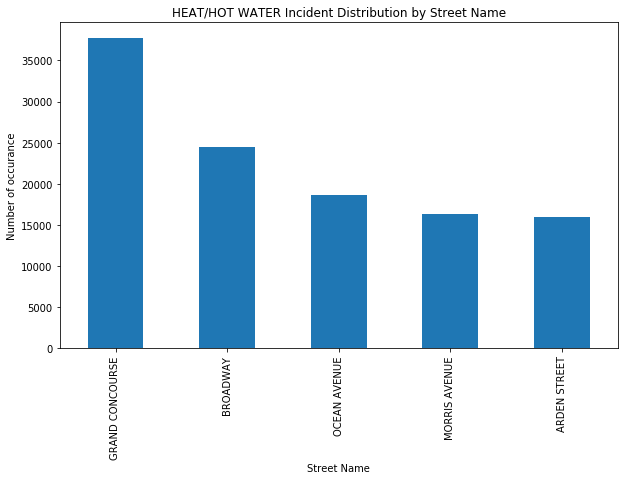

In [9]:
print(df_req['street_name'].value_counts().head())
df_req['street_name'].value_counts().head().plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Street Name') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Distribution by Street Name') # add title to the plot
#
plt.show()

As we can see here GRAND CONCOURSE street has highest number of occurences (37740) for complaint type Heat/hot water.

In [10]:
df_req.loc[df_req['street_name'] == 'GRAND CONCOURSE'].head()

,complaint_type,incident_zip,borough,street_name
119,HEAT/HOT WATER,10468.0,BRONX,GRAND CONCOURSE
173,HEAT/HOT WATER,10468.0,BRONX,GRAND CONCOURSE
463,HEAT/HOT WATER,10458.0,BRONX,GRAND CONCOURSE
533,HEAT/HOT WATER,10456.0,BRONX,GRAND CONCOURSE
647,HEAT/HOT WATER,10452.0,BRONX,GRAND CONCOURSE


More insight<br> GRAND CONCOURSE street  belongs to Bronx borough which has highest number of complaints recieved for HEAT/HOT Water.
Hence, both incident zip and street which we have identified are accordance with the highest number complaints which we recieved from a borough.

# We can have following concluding remarks in order to answer the question 2
1. We have to focus on Bronx and Brooklyn borough.
2. We have to focus on GRAND CONCOURSE street which is in Bronx.
3. We have to focus on incidents involving 11226.0 zip codes which belongs to Brooklyn borough.